## Downloading the data

In [1]:
#!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip unzip dino-dragon.zip

## Data preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# if you get some error install scipy and restart the Kernel
#!pip install scipy

  Using cached scipy-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers, models

from tensorflow.keras.preprocessing.image import ImageDataGenerator

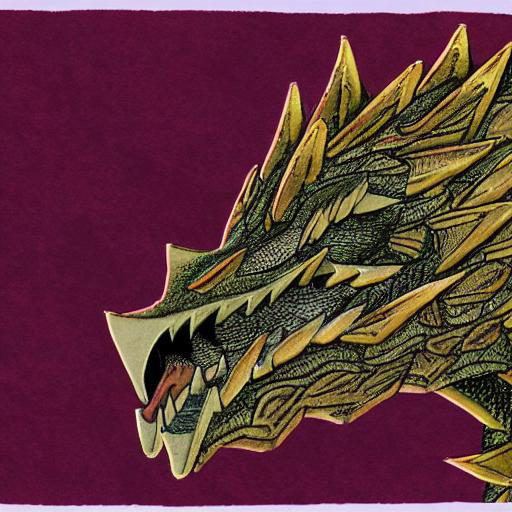

In [4]:
path = "data/train/dragon"
name = "024eadf4-3a93-4c4b-8e46-01c36700906e.jpg"
fullname = f"{path}/{name}"

load_img(fullname)

## The model

### ImageDataGenerator

https://www.kaggle.com/code/pietromaldini1/cnn-using-imagedatagenerator

https://stackoverflow.com/questions/59439128/what-does-class-mode-parameter-in-keras-image-gen-flow-from-directory-signify

In [11]:
import os

In [13]:
classes=sorted(os.listdir("./data/train")) 

",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:dino,1:dragon'

In [14]:
classes

['dino', 'dragon']

In [50]:
# processing the data

###
data_genenerator = ImageDataGenerator(rescale=1./255)

###
train_ds = data_genenerator.flow_from_directory(
    'data/train',
    classes=classes,
    color_mode="rgb",
    class_mode="binary",
    target_size=(150, 150),
    batch_size=20, 
    shuffle=True
)


test_ds = data_genenerator.flow_from_directory(
    'data/test',
    classes=classes,
    color_mode="rgb",
    class_mode="binary",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [51]:
# model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

# training
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 9s 109ms/step - loss: 0.5975 - accuracy: 0.6757 - val_loss: 0.4798 - val_accuracy: 0.7893
Epoch 2/10
80/80 [==============================] - 8s 105ms/step - loss: 0.4352 - accuracy: 0.8124 - val_loss: 0.4654 - val_accuracy: 0.7665
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3780 - accuracy: 0.8425 - val_loss: 0.3555 - val_accuracy: 0.8503
Epoch 4/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3268 - accuracy: 0.8670 - val_loss: 0.3642 - val_accuracy: 0.8350
Epoch 5/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2833 - accuracy: 0.8896 - val_loss: 0.3030 - val_accuracy: 0.8629
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2506 - accuracy: 0.9046 - val_loss: 0.3490 - val_accuracy: 0.8477
Epoch 7/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2415 - accuracy: 0.9078 - val_loss: 0.2828 - val_accuracy: 0.8832
Epoch 

## Using the model (part 1)

In [27]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

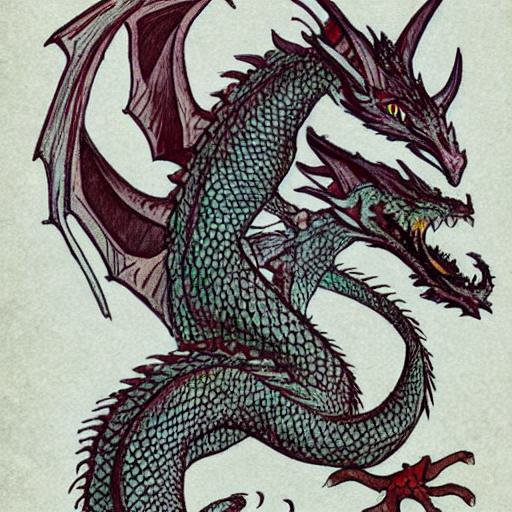

In [25]:
path = "data/test/dragon"
name = "3a876a9a-93f9-45fd-b7e5-73b4d88fb9cf.jpg"
fullname = f"{path}/{name}"


load_img(fullname)

In [29]:
img = load_img(fullname, target_size=(150, 150))

x = np.array(img)
X = np.array([x])

pred = model.predict(X)

1/1 [==============================] - 0s 33ms/step


In [32]:
if int(pred[0]) == 1:
    print("dragon")
else:
    print("dino")

dragon


## The questions

### Q1. Since we have binary classification problem, the best loss function for us is?
    
    BinaryCrossentropy

### Q2. The total number of paramaters is?
    
    11,215,873

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

### Q3. The median of training accuracy is?
    
    0.9

In [38]:
history.history

{'loss': [0.6217513680458069,
  0.47426262497901917,
  0.3929905593395233,
  0.35247546434402466,
  0.3096299469470978,
  0.2647911310195923,
  0.2508883476257324,
  0.23026373982429504,
  0.21687890589237213,
  0.1737358570098877],
 'accuracy': [0.6649937033653259,
  0.7898368835449219,
  0.8381430506706238,
  0.8582183122634888,
  0.8782935738563538,
  0.8977415561676025,
  0.9021329879760742,
  0.9159347414970398,
  0.922835648059845,
  0.941656231880188],
 'val_loss': [0.5324746966362,
  0.4136740565299988,
  0.3629642724990845,
  0.33242085576057434,
  0.32457807660102844,
  0.3171478807926178,
  0.28019362688064575,
  0.27051398158073425,
  0.2770076394081116,
  0.273995965719223],
 'val_accuracy': [0.7436548471450806,
  0.8375634551048279,
  0.8375634551048279,
  0.8553299307823181,
  0.8629441857337952,
  0.875634491443634,
  0.8781725764274597,
  0.8807106614112854,
  0.8883248567581177,
  0.8781725764274597]}

In [33]:
history.history["accuracy"]

[0.6649937033653259,
 0.7898368835449219,
 0.8381430506706238,
 0.8582183122634888,
 0.8782935738563538,
 0.8977415561676025,
 0.9021329879760742,
 0.9159347414970398,
 0.922835648059845,
 0.941656231880188]

In [36]:
np.mean(np.array(history.history["accuracy"])).round(1)

0.9

### Q4. Standard deviation of training loss is?

        0.13

In [37]:
np.std(np.array(history.history["loss"])).round(2)

0.13

## Data Augmentation

### Training the model we already started training

In [52]:
### 
data_generator = ImageDataGenerator(
    rescale=1./255, 
    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

###
train_ds = data_genenerator.flow_from_directory(
    'data/train',
    classes=classes,
    color_mode="rgb",
    class_mode="binary",
    target_size=(150, 150),
    batch_size=20, 
    shuffle=True
)


test_ds = data_genenerator.flow_from_directory(
    'data/test',
    classes=classes,
    color_mode="rgb",
    class_mode="binary",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

model.fit(train_ds, epochs=10, validation_data=test_ds)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 8s 106ms/step - loss: 0.1204 - accuracy: 0.9711 - val_loss: 0.2767 - val_accuracy: 0.8807
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.1098 - accuracy: 0.9718 - val_loss: 0.2725 - val_accuracy: 0.8807
Epoch 3/10
80/80 [==============================] - 9s 106ms/step - loss: 0.0860 - accuracy: 0.9824 - val_loss: 0.2768 - val_accuracy: 0.8909
Epoch 4/10
80/80 [==============================] - 9s 107ms/step - loss: 0.0699 - accuracy: 0.9868 - val_loss: 0.3325 - val_accuracy: 0.8553
Epoch 5/10
80/80 [==============================] - 9s 107ms/step - loss: 0.0599 - accuracy: 0.9918 - val_loss: 0.2756 - val_accuracy: 0.8858
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.0443 - accuracy: 0.9962 - val_loss: 0.2919 - val_accuracy: 0.8909
Epoch 7/10
80/80 [==============================] - 8s 106ms/step

### Q5. The mean of test loss for all the epochs for the model trained with augmentations is?

    0.34

In [42]:
np.mean(np.array(history.history["val_loss"])).round(2)

0.34

### The average of test accuracy for the last 5 epochs (6 to 10) for the model trained with augmentations is?

    0.28

In [43]:
np.mean(np.array(history.history["val_loss"][6:])).round(2)

0.28

## Using the model

In [54]:
tf.keras.models.save_model(model, 'model_v1.h5')

In [55]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

In [56]:
###
data_genenerator = ImageDataGenerator(rescale=1./255)

test_ds = data_genenerator.flow_from_directory(
    'data/test',
    classes=classes,
    color_mode="rgb",
    class_mode="binary",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 394 images belonging to 2 classes.


In [57]:
model = keras.models.load_model('model_v1.h5')

In [58]:
path = "data/test/dragon"
name = "3a876a9a-93f9-45fd-b7e5-73b4d88fb9cf.jpg"
fullname = f"{path}/{name}"


img = load_img(fullname, target_size=(150, 150))

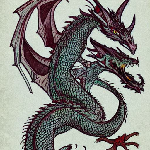

In [59]:
img

In [60]:
x = np.array(img)
X = np.array([x])

pred = model.predict(X)

if int(pred[0]) == 1:
    print("dragon")
else:
    print("dino")

1/1 [==============================] - 0s 46ms/step
dragon
